In [83]:
# Basic libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Metrics libs
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

# Modeling libs
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [38]:
df = pd.read_csv('penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [26]:
df.shape

(344, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [28]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Data Cleaning

In [29]:
# Checking null values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [39]:
# Removing missing "sex" rows
df.dropna(subset=['sex'], inplace = True)

In [40]:
# Filling all missing numeric values with median value
median = df['bill_length_mm'].median()
df['bill_length_mm'].fillna(median, inplace=True)

median = df['bill_depth_mm'].median()
df['bill_depth_mm'].fillna(median, inplace=True)

median = df['flipper_length_mm'].median()
df['flipper_length_mm'].fillna(median, inplace=True)

median = df['body_mass_g'].median()
df['body_mass_g'].fillna(median, inplace=True)

In [13]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [41]:
# Checking duplicated
print(df.duplicated)

<bound method DataFrame.duplicated of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MA

In [42]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [43]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [44]:
# Resetting index
df.reset_index(inplace=True, drop=True)

## Data Encoding

In [45]:
# Applying One-hot Encoding on the "sex" column
label_encoder = LabelEncoder()
column_encoded = label_encoder.fit_transform(df['sex'])
column_reshaped = column_encoded.reshape(len(column_encoded), 1)

onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first', categories='auto')
column_onehot_encoded = onehot_encoder.fit_transform(column_reshaped)

ohe_df = pd.DataFrame(column_onehot_encoded)
df = df.rename({0: "sex"}, axis=1)
df.drop(columns=['sex'], inplace=True)
df = df.join(ohe_df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,0
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1.0
...,...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0.0
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0.0
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1.0
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0.0


In [50]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1.0


In [51]:
# Applying Ordinal Encoding on the "island" column 
islands_dict = {'Biscoe': 1, 'Dream': 2, 'Torgersen': 3}

# Setting the new column as int64 to make it appear in the heatmap below
df['island_ordinal'] = df.island.map(islands_dict).astype('int64')
df.drop(columns=['island'], inplace=True)
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_ordinal
0,Adelie,39.1,18.7,181.0,3750.0,1.0,3
1,Adelie,39.5,17.4,186.0,3800.0,0.0,3
2,Adelie,40.3,18.0,195.0,3250.0,0.0,3
3,Adelie,36.7,19.3,193.0,3450.0,0.0,3
4,Adelie,39.3,20.6,190.0,3650.0,1.0,3
...,...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,0.0,1
329,Gentoo,46.8,14.3,215.0,4850.0,0.0,1
330,Gentoo,50.4,15.7,222.0,5750.0,1.0,1
331,Gentoo,45.2,14.8,212.0,5200.0,0.0,1


In [52]:
df = df.rename({"island_ordinal": "island"}, axis=1)
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island
0,Adelie,39.1,18.7,181.0,3750.0,1.0,3
1,Adelie,39.5,17.4,186.0,3800.0,0.0,3
2,Adelie,40.3,18.0,195.0,3250.0,0.0,3
3,Adelie,36.7,19.3,193.0,3450.0,0.0,3
4,Adelie,39.3,20.6,190.0,3650.0,1.0,3
...,...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,0.0,1
329,Gentoo,46.8,14.3,215.0,4850.0,0.0,1
330,Gentoo,50.4,15.7,222.0,5750.0,1.0,1
331,Gentoo,45.2,14.8,212.0,5200.0,0.0,1


In [53]:
# Frequency distribution of species
pd.crosstab(index=df["species"], columns="count")

col_0,count
species,
Adelie,146
Chinstrap,68
Gentoo,119


## Data Visualization

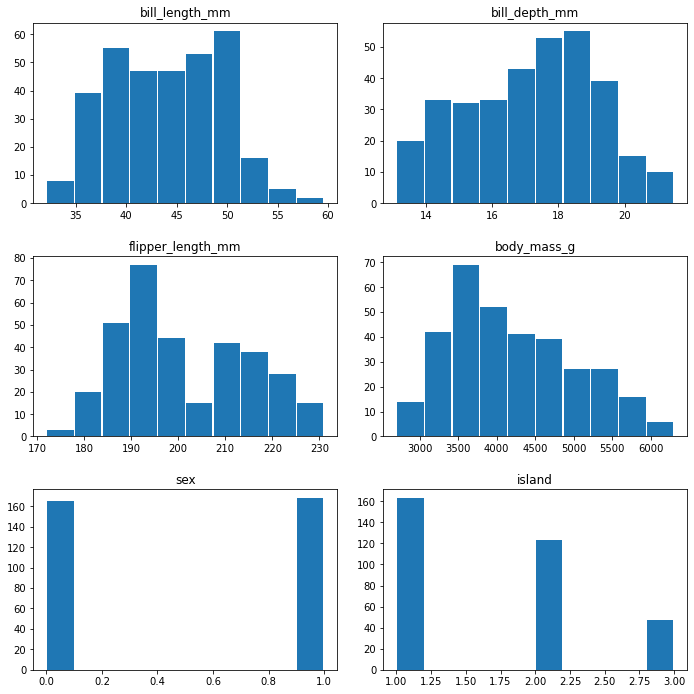

In [78]:
# Creating a histogram for each feature
n_bins = 10
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

axs[0,0].hist(df.iloc[:,1].values, bins = n_bins, rwidth=0.95)
axs[0,0].set_title('bill_length_mm')

axs[0,1].hist(df.iloc[:,2].values, bins = n_bins, rwidth=0.95)
axs[0,1].set_title('bill_depth_mm')

axs[1,0].hist(df.iloc[:,3].values, bins = n_bins, rwidth=0.95)
axs[1,0].set_title('flipper_length_mm')

axs[1,1].hist(df.iloc[:,4].values, bins = n_bins, rwidth=0.95)
axs[1,1].set_title('body_mass_g')

axs[2,0].hist(df.iloc[:,5].values, bins = n_bins, rwidth=0.95)
axs[2,0].set_title('sex')

axs[2,1].hist(df.iloc[:,6].values, bins = n_bins, rwidth=0.95)
axs[2,1].set_title('island')

# Adding some white spacing between subplots
fig.tight_layout(pad=2)

## Modeling

In [79]:
# Feature selection
x = df.iloc[:,1:].values
y = df.iloc[:,0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [80]:
# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test) 
accuracy_nb = round(metrics.accuracy_score(y_test, Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

cm = metrics.confusion_matrix(y_test, Y_pred)
accuracy = metrics.accuracy_score(y_test, Y_pred)
precision = metrics.precision_score(y_test, Y_pred, average='micro')
recall = metrics.recall_score(y_test, Y_pred, average='micro')
f1 = metrics.f1_score(y_test, Y_pred, average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[46  2  0]
 [ 3 13  0]
 [ 0  0 36]]
accuracy_Naive Bayes: 0.950
precision_Naive Bayes: 0.950
recall_Naive Bayes: 0.950
f1-score_Naive Bayes : 0.950


Text(0, 0.5, 'Mean Error')

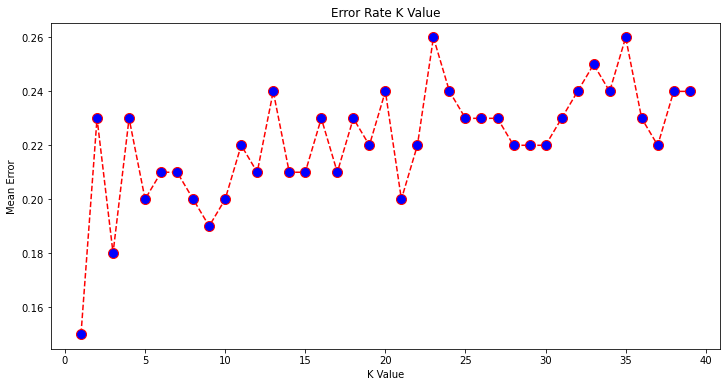

In [81]:
# KNN (K-Nearest Neighbor)
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
# Plot the error values against K values to find the best value for K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

<Figure size 432x288 with 0 Axes>

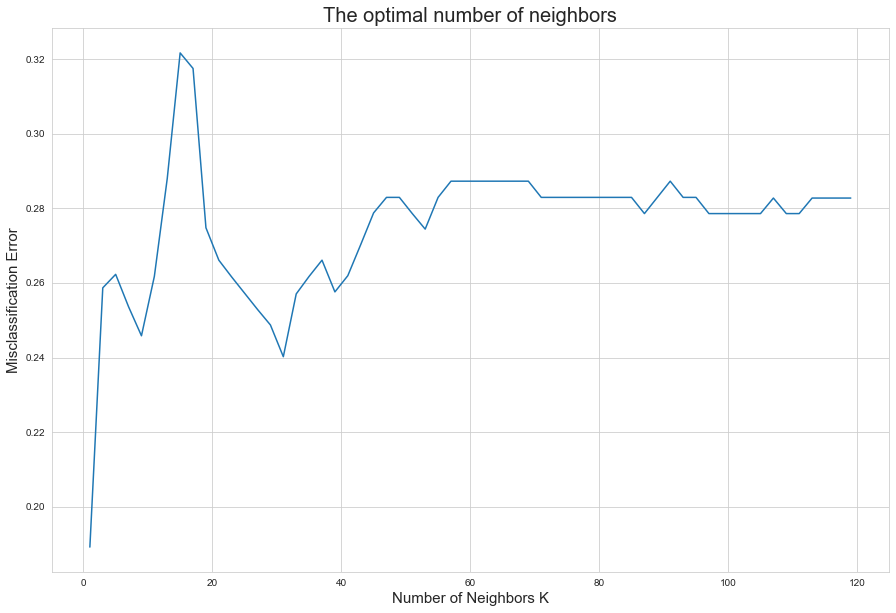

The optimal number of neighbors is 1.


In [85]:
# Using Cross Validation for parameter tuning

# Creating list of K for KNN
k_list = list(range(1,120,2))
# creating list of cv scores
cv_scores = []

# Performing K-fold cross validation (K = 10)
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# Changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20)
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

# Finding best K
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

In [86]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test) 
accuracy_knn=round(metrics.accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

cm = metrics.confusion_matrix(y_test, Y_pred)
accuracy = metrics.accuracy_score(y_test,Y_pred)
precision = metrics.precision_score(y_test, Y_pred,average='micro')
recall = metrics.recall_score(y_test, Y_pred,average='micro')
f1 = metrics.f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[44  3  1]
 [ 5 10  1]
 [ 0  5 31]]
accuracy_KNN : 0.850
precision_KNN : 0.850
recall_KNN: 0.850
f1-score_KNN : 0.850


In [87]:
# Support Vector Machine
linear_svc = LinearSVC(dual=False)
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
accuracy_svc=round(metrics.accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

cm = metrics.confusion_matrix(y_test, Y_pred)
accuracy = metrics.accuracy_score(y_test,Y_pred)
precision = metrics.precision_score(y_test, Y_pred,average='micro')
recall = metrics.recall_score(y_test, Y_pred,average='micro')
f1 = metrics.f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[48  0  0]
 [ 2 14  0]
 [ 0  0 36]]
accuracy_SVC: 0.980
precision_SVC: 0.980
recall_SVC: 0.980
f1-score_SVC : 0.980


In [88]:
# Comparing classification results
results = pd.DataFrame({
    'Model': ['KNN', 
              'Naive Bayes',  
              'Support Vector Machine'],
    'Score': [acc_knn,
              acc_gaussian,  
              acc_linear_svc],
    "Accuracy_score":[accuracy_knn,
                      accuracy_nb,
                      accuracy_svc
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df

,Model,Score,Accuracy_score
0,Support Vector Machine,100.00,98.0
1,Naive Bayes,97.42,95.0
2,KNN,100.00,85.0
